## Kickoff

# Contents
* EDA
    * Synthetic samples in test set
    * Target distribution
    * Missing value
    * Overall feature distribution
    * Conditional distribution P(X|Y)
    * Train-test difference
    * skew and kurtosis
    * Feature correlation
    * Duplicates values
* Feature engineering

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = 'data/'
train_df = pd.read_csv(data_path + 'train.csv', index_col=0)
test_df = pd.read_csv(data_path + 'test.csv', index_col=0)
submission = pd.read_csv(data_path + 'sample_submission.csv')


In [26]:
plt.rcParams["font.size"] = 16
# plt.rcParams.keys()

In [175]:
target = train_df['target']
train_df.drop(columns = ['target'], inplace = True)

In [3]:
train_df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test_df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [66]:
# Global variable
N_FEATURE = 200

# EDA

## Synthetic sample

* train-test 분포가 유사해보이나, number of unique values가 상당히 차이가 남
* 이 대회의 경우 전체 데이터셋의 75%만 private 채점에 사용되고 그게 상당히 특이하다고 생각되었는데 synthetic sample이 포함되었기 때문일 가능성 높다
* real distribution에서 sampling해서 data를 generation했을거라 추정
* Train-test distribution 차이를 확인할 때 fake는 제외하고 해야 함

In [ ]:
from tqdm import tqdm
# test_df = test_df.values

unique_samples = []
unique_count = np.zeros_like(test_df)
for feature in tqdm(range(test_df.shape[1])):
    _, index_, count_ = np.unique(test_df[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

# 딱 한 번만 나타나는 값을 가진 sample을 real로 추정 (모든 feature중에 한 번이라도!))
# Samples which have unique values are real the others are fake
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print(len(real_samples_indexes))
print(len(synthetic_samples_indexes))

## Target distribution
* prior probability of transaction: 10%

In [5]:
v, c = np.unique(target, return_counts = True)
print(c / c.sum())

[0.89951 0.10049]


## Missing value
* There are no missing values for both train/test
* 일단은, categorical 변수 없이 전부 numerical으로 보임

In [9]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))
missing_df = missing_data(train_df)

In [10]:
missing_df

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## Overall feature distribution
* standard deviation이 커보임
* train-test 분포가 아주 유사해보임
* 평균값의 변화가 커보임
* real과 fake의 차이는 없어보임

In [177]:
train_describe_df = train_df.describe()
test_describe_df = test_df.describe()
test_describe_df_sub = test_df.iloc[real_samples_indexes,:].describe()

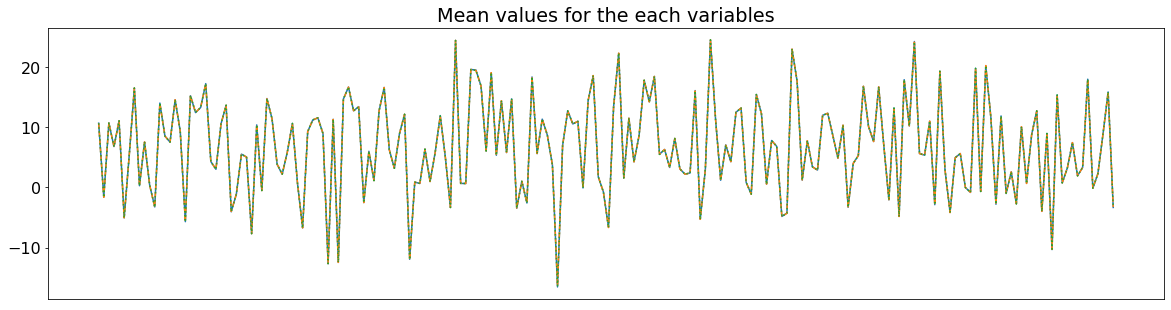

In [178]:
plt.figure(figsize = (20, 5))
plt.title('Mean values for the each variables')
plt.plot(train_describe_df.loc['mean',:], label = 'Train')
plt.plot(test_describe_df.loc['mean',:],'--',label = 'Test')
plt.plot(test_describe_df_sub.loc['mean',:],':',label = 'Test - subsampled (real)')

plt.xticks([])
plt.show()

In [174]:
train_describe_df.loc['mean',:]

target      0.100490
var_0      10.679914
var_1      -1.627622
var_2      10.715192
var_3       6.796529
             ...    
var_195    -0.142088
var_196     2.303335
var_197     8.908158
var_198    15.870720
var_199    -3.326537
Name: mean, Length: 201, dtype: float64

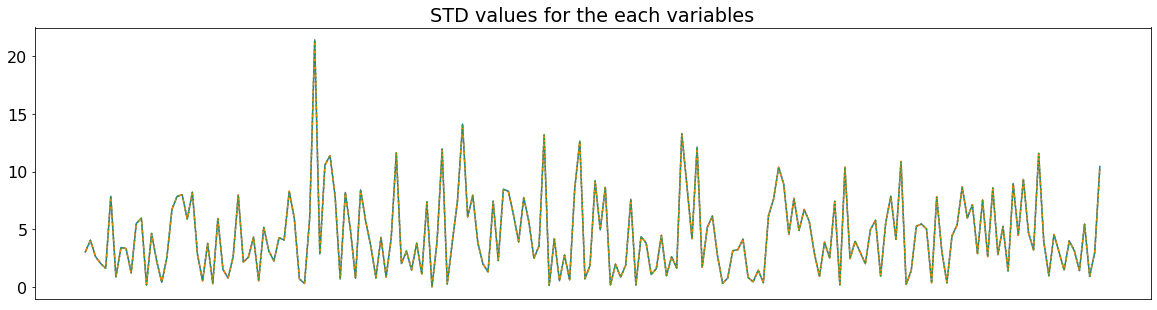

In [179]:
plt.figure(figsize = (20, 5))
plt.title('STD values for the each variables')
plt.plot(train_describe_df.loc['std',:], label = 'Train')
plt.plot(test_describe_df.loc['std',:],'--',label = 'Test')
plt.plot(test_describe_df_sub.loc['std',:],':',label = 'Test - real')
plt.xticks([])
plt.show()

## Conditional distribution P(X|Y)
* X: feature, Y: target
* 12,  68,  91, 108, 148 에서 distribution의 차이가 큼 (metric: KL divergence)

In [91]:
from scipy.stats import norm
def KL(P,Q):
    """ Epsilon is used here to avoid conditional code for
    checking that neither P nor Q is equal to 0. """
    epsilon = 0.00001

    # You may want to instead make copies to avoid changing the np arrays.
    P = P+epsilon
    Q = Q+epsilon

    divergence = np.sum(P*np.log(P/Q))
    return divergence

kl_result = []
for var_idx in range(N_FEATURE):
    feature = train_df['var_'+ str(var_idx)]
    x = np.arange(feature.min(), feature.max(), step = (feature.max() - feature.min()) / 100)

    mean_1 = feature[target == 0].mean()
    std_1 = feature[target == 0].std()
    mean_2 = feature[target == 1].mean()
    std_2 = feature[target == 1].std()
    p = norm.pdf(x, mean_1, std_1)
    q = norm.pdf(x, mean_2, std_2)

    kl_divergence = KL(p, q)
    kl_result.append(kl_divergence)

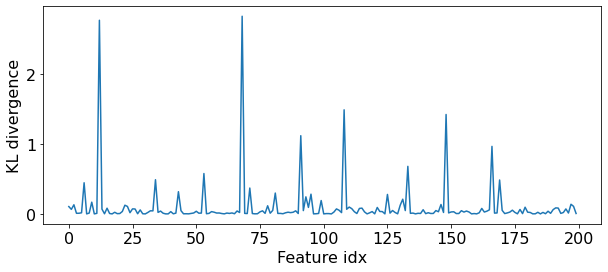

In [92]:
plt.figure(figsize = (10, 4))
plt.plot(kl_result)
plt.xlabel('Feature idx')
plt.ylabel('KL divergence')
plt.show()

In [85]:
np.where(np.array(kl_result) > 1)[0]

array([ 12,  68,  91, 108, 148], dtype=int64)

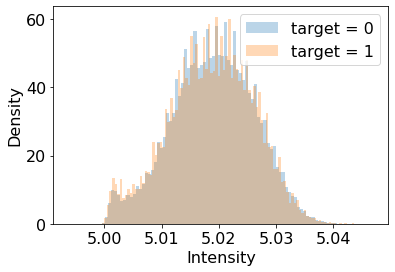

In [105]:
var_idx = 68
plt.hist(train_df.loc[target == 0, 'var_' + str(var_idx)], density = True, alpha = 0.3, bins = 100, label = 'target = 0')
plt.hist(train_df.loc[target == 1, 'var_'+ str(var_idx)], density = True, alpha = 0.3, bins = 100, label = 'target = 1')
plt.ylabel('Density')
plt.xlabel('Intensity')
plt.legend()
plt.show()

## Train-test difference
* 전체적으로 모든 feature에 대해서 매우 유사한 분포를 보임

In [101]:
kl_result = []
for var_idx in range(N_FEATURE):
    feature_1 = train_df['var_'+ str(var_idx)]
    feature_2 = test_df['var_'+ str(var_idx)]

    x = np.arange(feature.min(), feature.max(), step = (feature.max() - feature.min()) / 100)
    mean_1 = feature_1.mean()
    std_1 = feature_1.std()
    mean_2 = feature_2.mean()
    std_2 = feature_2.std()
    p = norm.pdf(x, mean_1, std_1)
    q = norm.pdf(x, mean_2, std_2)

    kl_divergence = KL(p, q)
    kl_result.append(kl_divergence)

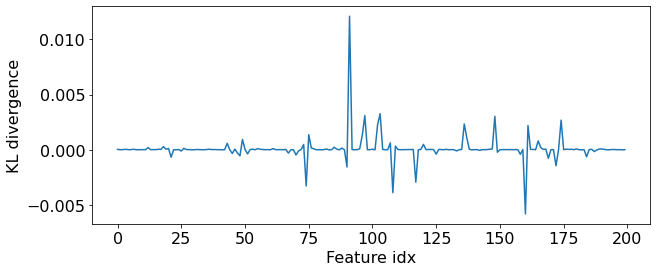

In [102]:
plt.figure(figsize = (10, 4))
plt.plot(kl_result)
plt.xlabel('Feature idx')
plt.ylabel('KL divergence')
plt.show()

In [103]:
np.where(np.array(kl_result) > 0.01)[0]

array([91], dtype=int64)

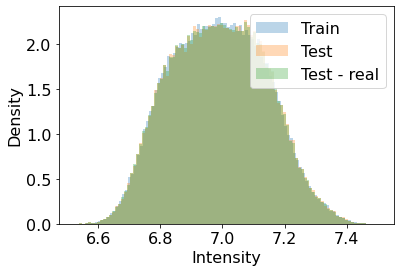

In [181]:
var_idx = 91
plt.hist(train_df['var_' + str(var_idx)], density = True, alpha = 0.3, bins = 100, label = 'Train')
plt.hist(test_df['var_'+ str(var_idx)], density = True, alpha = 0.3, bins = 100, label = 'Test')
plt.hist(test_df['var_'+ str(var_idx)].iloc[real_samples_indexes], density = True, alpha = 0.3, bins = 100, label = 'Test - real')
plt.ylabel('Density')
plt.xlabel('Intensity')
plt.legend()
plt.show()

## skew and kurtosis
* Skewness: 비대칭 정도의 척도 (클수록 비대칭)
* Kurtosis: Outlier 정도의 척도 (클수록 outlier 존재 가능성 큼)

1. Train-Test skewness 유사
2. Sample별 conditional skewness 0에 가까움 (거의 대칭인 분포)
3. Feature별 conditional skewness 0에 가까움 (거의 대칭인 분포)
4. Train-Test kurtosis 유사
5. Sample별 conditional kurtosis 유사 (Outlier 정도가 비슷)
6. Feature별 conditional kurtosis 0에 가까움 (feature outlier 거의 없음)

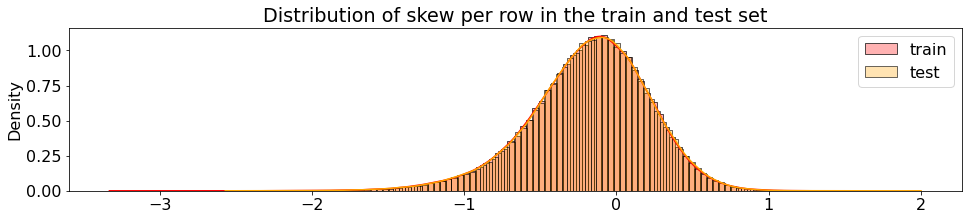

In [132]:
features = [f'var_{i}' for i in range(200)]

plt.figure(figsize=(16,3))
plt.title("Distribution of skew per row in the train and test set")
sns.histplot(train_df[features].skew(axis=1),color="red", kde=True,bins=120, label='train', alpha = 0.3, stat="density")
sns.histplot(test_df[features].skew(axis=1),color="orange", kde=True,bins=120, label='test', alpha = 0.3, stat="density")
plt.legend()
plt.show()

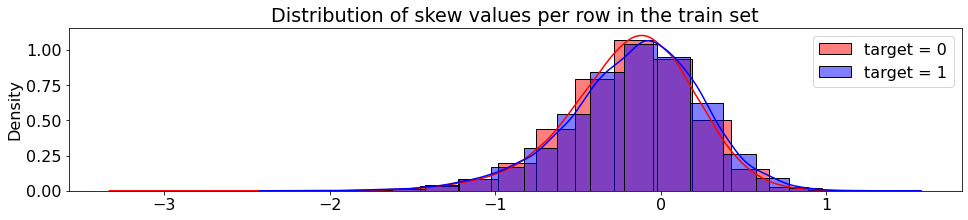

In [140]:
t0 = train_df.loc[target == 0]
t1 = train_df.loc[target == 1]
plt.figure(figsize=(16,3))
plt.title("Distribution of skew values per row in the train set")
sns.histplot(t0[features].skew(axis=1),color="red", kde=True,bins=20, label='target = 0', stat="density")
sns.histplot(t1[features].skew(axis=1),color="blue", kde=True,bins=20, label='target = 1', stat="density")
plt.legend(); plt.show()

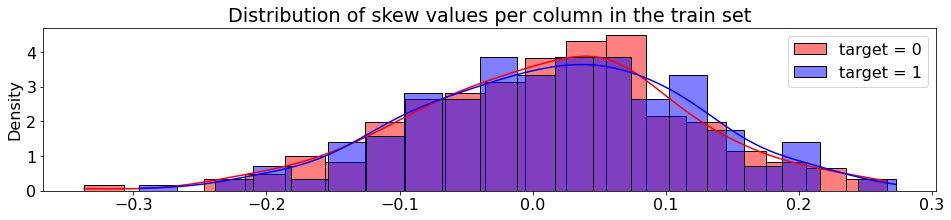

In [131]:
t0 = train_df.loc[target == 0]
t1 = train_df.loc[target == 1]
plt.figure(figsize=(16,3))
plt.title("Distribution of skew values per column in the train set")
sns.histplot(t0[features].skew(axis=0),color="red", kde=True,bins=20, label='target = 0', stat="density")
sns.histplot(t1[features].skew(axis=0),color="blue", kde=True,bins=20, label='target = 1', stat="density")
plt.legend(); plt.show()

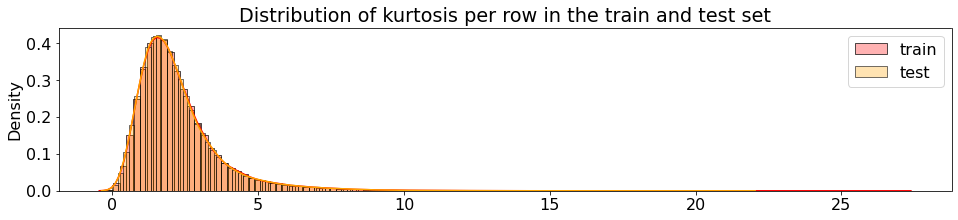

In [139]:
features = [f'var_{i}' for i in range(200)]

plt.figure(figsize=(16,3))
plt.title("Distribution of kurtosis per row in the train and test set")
sns.histplot(train_df[features].kurtosis(axis=1),color="red", kde=True,bins=120, label='train', alpha = 0.3, stat="density")
sns.histplot(test_df[features].kurtosis(axis=1),color="orange", kde=True,bins=120, label='test', alpha = 0.3, stat="density")
plt.legend()
plt.show()

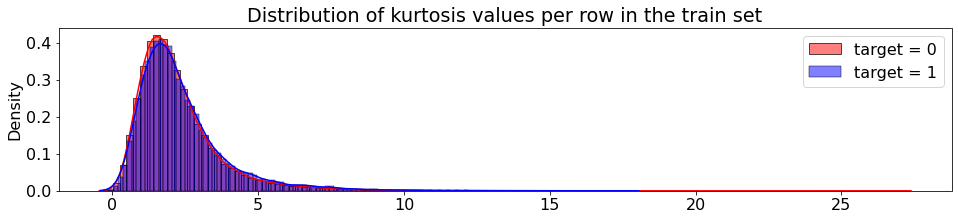

In [136]:
t0 = train_df.loc[target == 0]
t1 = train_df.loc[target == 1]
plt.figure(figsize=(16,3))
plt.title("Distribution of kurtosis values per row in the train set")
sns.histplot(t0[features].kurtosis(axis=1),color="red", kde=True,bins=120, label='target = 0', stat="density")
sns.histplot(t1[features].kurtosis(axis=1),color="blue", kde=True,bins=120, label='target = 1', stat="density")
plt.legend(); plt.show()

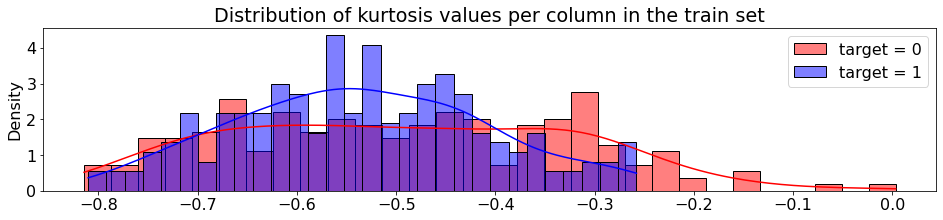

In [137]:
t0 = train_df.loc[target == 0]
t1 = train_df.loc[target == 1]
plt.figure(figsize=(16,3))
plt.title("Distribution of kurtosis values per column in the train set")
sns.histplot(t0[features].kurtosis(axis=0),color="red", kde=True,bins=30, label='target = 0', stat="density")
sns.histplot(t1[features].kurtosis(axis=0),color="blue", kde=True,bins=30, label='target = 1', stat="density")
plt.legend(); plt.show()

## Feature correlation
* 전부 numerical feature이므로 correlation을 통한 특징간 관계성 파악이 용이
 Feature correlation
* 전부 numerical feature이므로 correlation을 통한 특징간 관계성 파악이 용이
* 전체적으로 correlation이 매우 낮아 피쳐간 관계성은 보이지 않음

In [144]:
correlations = train_df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']] # feature_1 = feature_2 제거
correlations = correlations.iloc[range(0, correlations.shape[0], 2),:] # 중복 제거

In [146]:
correlations

,level_0,level_1,0
0,var_75,var_191,2.703975e-08
2,var_173,var_6,5.942735e-08
4,var_126,var_109,1.313947e-07
6,var_144,var_27,1.772502e-07
8,var_177,var_100,3.116544e-07
...,...,...,...
39790,var_183,var_189,9.358682e-03
39792,var_174,var_81,9.489853e-03
39794,var_81,var_165,9.713658e-03
39796,var_53,var_148,9.787532e-03


## Duplicates values
* Numerical이라 duplicate가 의미가 있을지?
* 특이하게 소수점 4째자리 동일한 값이 1000개의 sample에 존재

In [147]:
unique_max_train = []
unique_max_test = []
for feature in features:
    values = train_df[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = test_df[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])

In [148]:
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

,68,108,126,12,91,103,148,71,161,25,125,169,166,133,43
Feature,var_68,var_108,var_126,var_12,var_91,var_103,var_148,var_71,var_161,var_25,var_125,var_169,var_166,var_133,var_43
Max duplicates,1084,313,305,203,66,61,59,54,52,41,40,39,39,39,39
Value,5.0214,14.1999,11.5356,13.5545,6.9537,1.6662,4.0456,0.7031,5.7688,13.6723,12.5159,5.6941,2.7306,6.8876,11.4522


## Feature engineering
* feature engineering시, train, test 따로 할 게 아니고 이렇게 해야 실수가 안 생기는 듯
* 추가된 feature: sum, min, max, mean, std, skew, kurt, med
* mean과 sum이 중복된 것 같다,,
* rounded feature (소수점 1,2째자리)가 추가되었는데, 어떤 효과가 있을지는 모델을 build해보고 비교해봐야 알 수 있을 듯
    * 의도는 과적합 방지

In [150]:
idx = features
for df in [test_df, train_df]:
    # df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

In [152]:
idx = features
for df in [test_df, train_df]:
    df['r2_' + feature] = np.round(df[feature], 2)
    df['r1_' + feature] = np.round(df[feature], 1)

## References
votes 순서대로..!  

1. [Santander EDA and Prediction](https://www.kaggle.com/gpreda/santander-eda-and-prediction)  
    * 기본적인 분석을 시도하였으나 각각의 분석이 feature engineering에 반영되었다거나 모델 성능 향상에 도움을 주었다고 보기는 어려운 듯
    * 분석 결과 해석 x
2. [List of Fake Samples and Public/Private LB split](https://www.kaggle.com/yag320/list-of-fake-samples-and-public-private-lb-split)
    * Fake sample 발견.. 대단..!